In [1]:
import sys

sys.path.append("..")

In [2]:
# create agent and environment

from mini_rl.environments import GridWorld


env = GridWorld(
    width=4,
    height=4,
    start_pos=(0, 0),
    goal_pos=[(3, 3)],
    obstacles=[(1, 1), (1, 2), (2, 2), (2, 1)],
    terminal_reward=1.0,
    step_penalty=0.1,
    max_steps=100,
)
print(env.render())

A . . .
. # # .
. # # .
. . . G



In [3]:
from mini_rl.agents import SarsaAgent
from mini_rl.policy import DeterministicTabularPolicy, EpsilonGreedyPolicy
from mini_rl.value_fns import TabularActionValueFunction

# Create agent components
n_states = env.get_num_states()
n_actions = env.get_num_actions()

# Q-function
q_function = TabularActionValueFunction(n_states, n_actions)

# Base policy (will be updated based on Q-values)
base_policy = DeterministicTabularPolicy(n_states, n_actions)

# Epsilon-greedy exploration policy
epsilon = 0.5
policy = EpsilonGreedyPolicy(base_policy, epsilon, decay_rate=0.99)

# Create Q-learning agent
agent = SarsaAgent(policy, q_function, gamma=0.99)


In [ ]:
from IPython.display import clear_output
from mini_rl.visualize import visualize_grid_world
from time import sleep


def train_agent(env, agent, num_episodes=10000, render=False, render_freq=100):
    for e in range(num_episodes):
        state = env.reset()
        done = False
        step = 0
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.learn((state, action, reward, next_state, done))
            state = next_state

            if render and e % render_freq == 0:
                clear_output(wait=True)
                print(env.render())
                print("Q-Table:")
                print(agent.Q.values)
                print("\nPolicy:")
                print(base_policy.policy)
                sleep(0.1)

            policy.decay_epsilon()
            print(f"\nEpisode {e + 1}/{num_episodes}, Step {step}, e-greedy: {policy.epsilon:.3f}", end="\r")
            step += 1


train_agent(env, agent, num_episodes=100, render=True, render_freq=1)

. . . .
. # # .
. # # .
. . . A

Q-Table:
[[-0.2560815  -0.25401074  0.29685459 -0.21297278]
 [-0.19926124 -0.190558   -0.19839332 -0.20477025]
 [-0.13020104 -0.08273607 -0.12842814 -0.12871281]
 [-0.05994782 -0.05887384  0.13481922 -0.07128665]
 [-0.1783794  -0.18793265  0.46598211 -0.18012869]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.02187001 -0.01999     0.48636551 -0.01999   ]
 [-0.12040368 -0.10945165  0.61499694 -0.10855899]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.0215938  -0.01        0.86491483  0.        ]
 [-0.05824999  0.75892107 -0.04141997 -0.0499001 ]
 [-0.0288919   0.88807974 -0.01        0.05451006]
 [-0.0091      0.99980337  0.         -0.00607025]
 [ 0.          0.          0.          0.        ]]

Policy:
[2 1 1 2 2 0 0 2 2 0 0 2 1 1 1 0]



(<Figure size 1500x1200 with 1 Axes>,
 <Axes: title={'center': 'Grid World with Q-Values'}>)

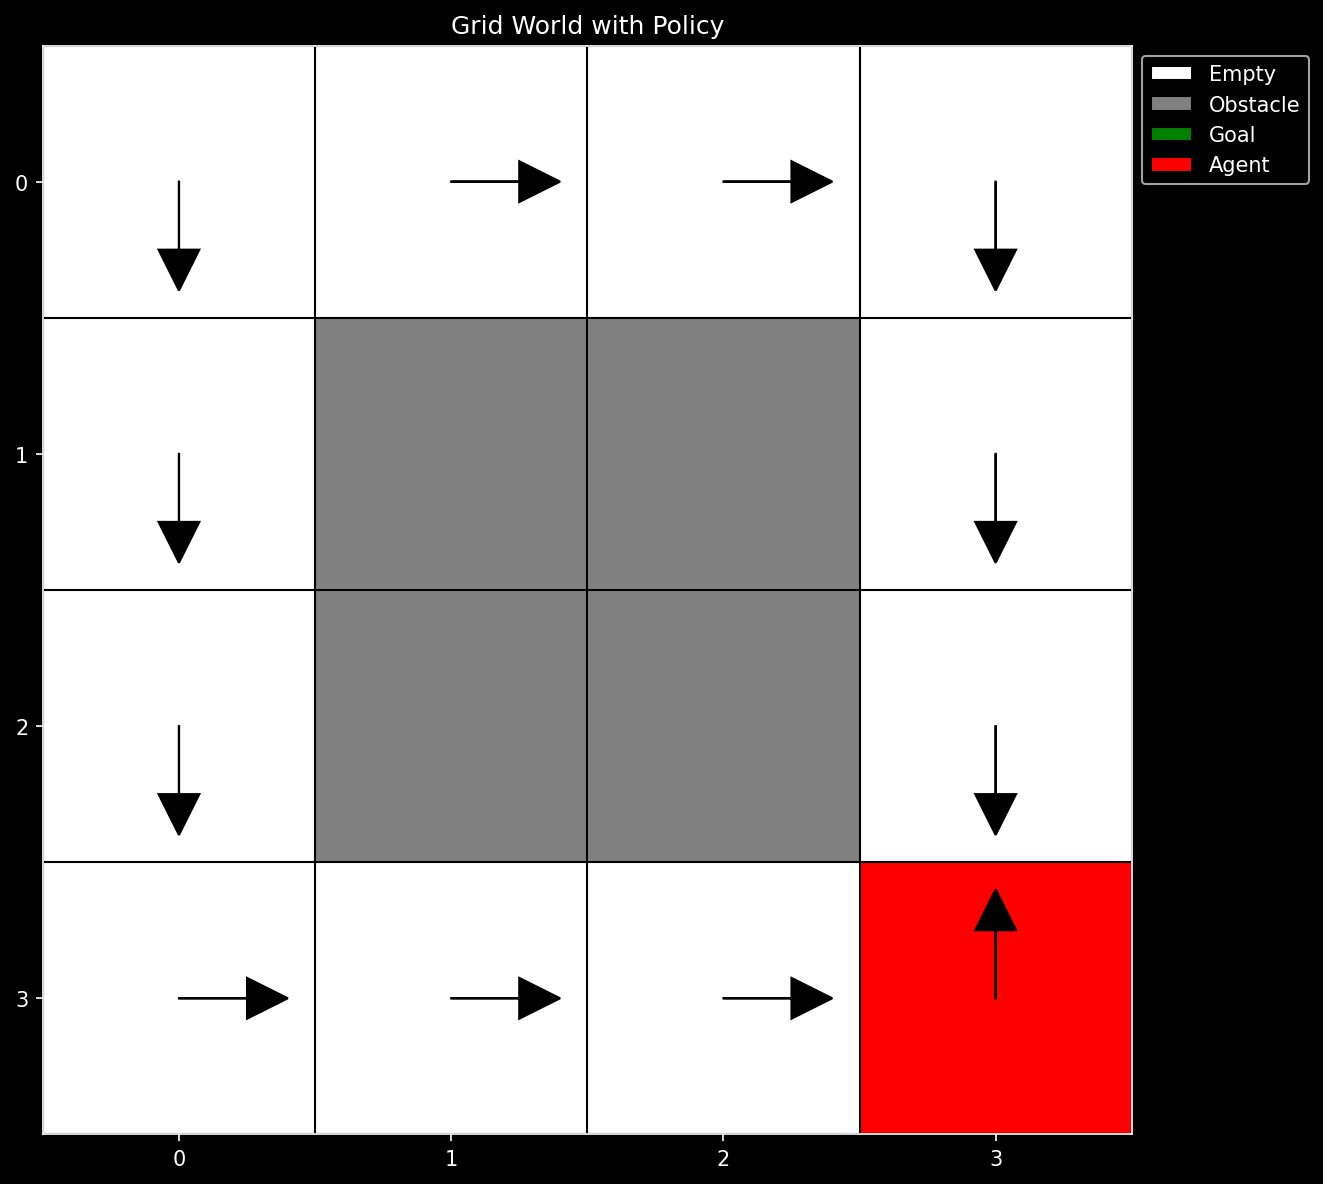

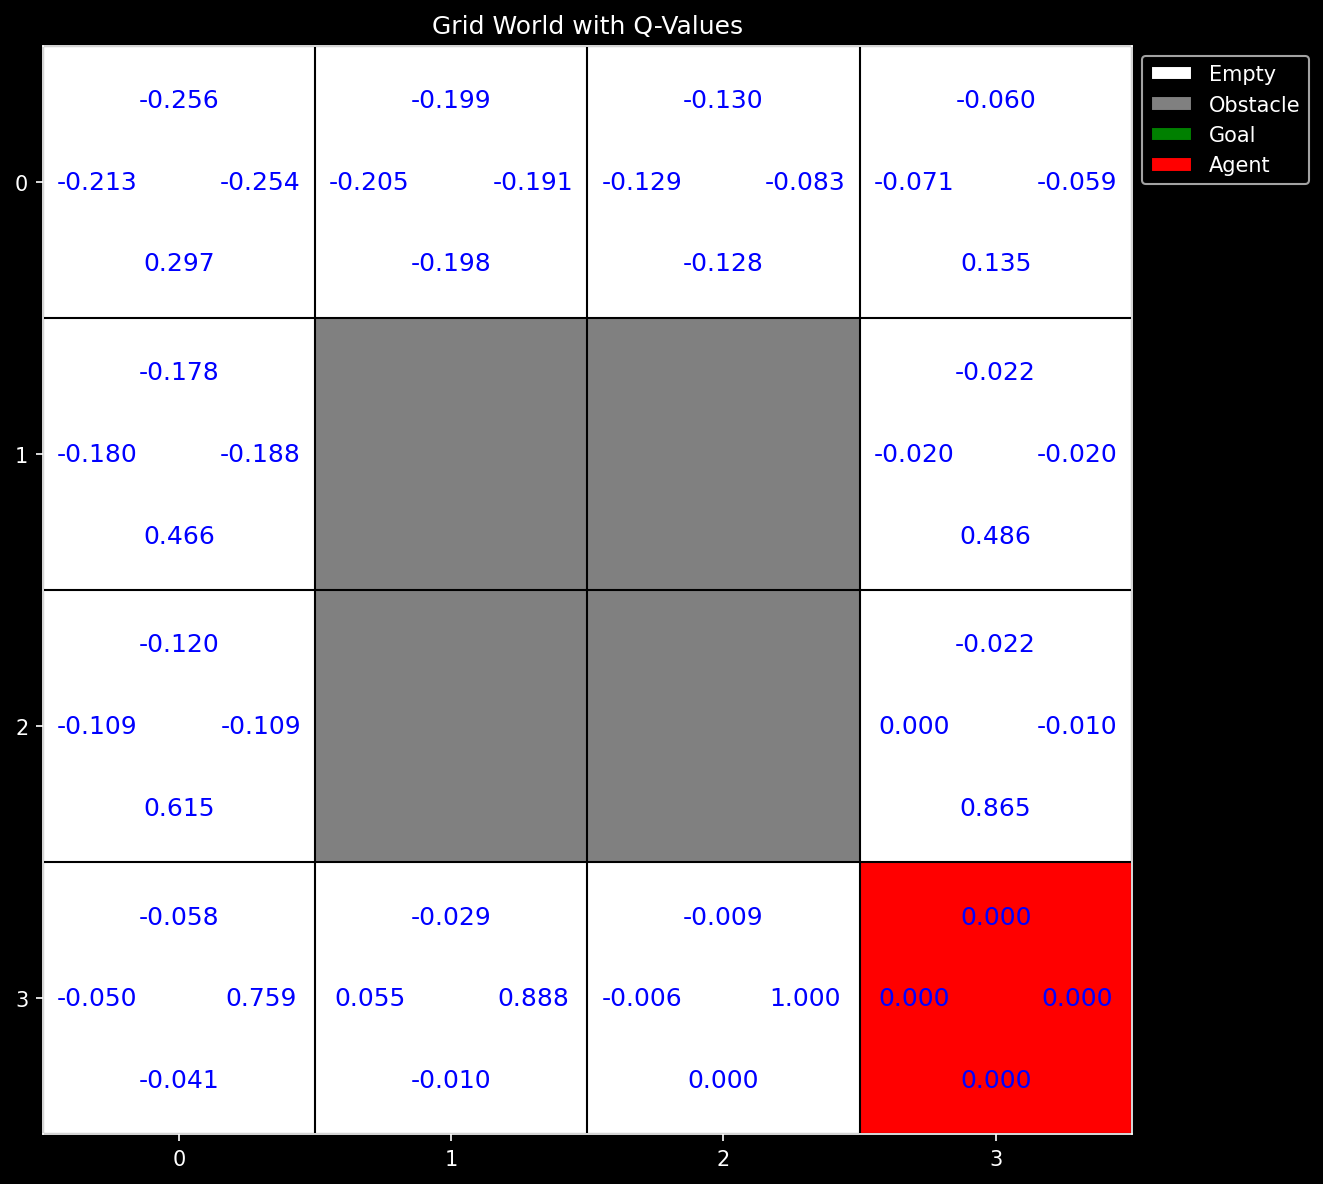

In [5]:
visualize_grid_world(env, agent, q_function, plot_type="policy")
visualize_grid_world(env, agent, q_function, plot_type="q_values")